[![nbviewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.jupyter.org/github/open-atmos/PyPartMC-examples/blob/main/notebooks/particle_simulation.ipynb)   
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PyPartMC-examples/blob/main/notebooks/particle_simulation.ipynb)    
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PyPartMC-examples.git/main?urlpath=lab/tree/notebooks/particle_simulation.ipynb)

In [1]:
# This file is a part of PyPartMC licensed under the GNU General Public License v3
# Copyright (C) 2023 University of Illinois Urbana-Champaign
# Authors:
#  - https://github.com/compdyn/partmc/graphs/contributors
#  - https://github.com/open-atmos/PyPartMC/graphs/contributors

In [2]:
import sys
if 'google.colab' in sys.modules:
    !pip --verbose install PyPartMC

In [3]:
import PyPartMC as ppmc
from PyPartMC import si
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [4]:
gas_data = ppmc.GasData(
    ("H2SO4", "HNO3", "HCl", "NH3", "NO", "NO2")
)

In [5]:
env_state = ppmc.EnvState({
        "rel_humidity": 0.95,
        "latitude": 0,
        "longitude": 0,
        "altitude": 0 * si.m,
        "start_time": 81000 * si.s,
        "start_day": 200
        })

In [6]:
aero_data = ppmc.AeroData((
    #         density  ions in soln (1) molecular weight    kappa (1)
    #         |                     |   |                   |
    {"SO4":  [1800 * si.kg/si.m**3, 1,  96.0 * si.g/si.mol, 0.00]},
    {"NO3":  [1800 * si.kg/si.m**3, 1,  62.0 * si.g/si.mol, 0.00]},
    {"Cl":   [2200 * si.kg/si.m**3, 1,  35.5 * si.g/si.mol, 0.00]},
    {"NH4":  [1800 * si.kg/si.m**3, 1,  18.0 * si.g/si.mol, 0.00]},
    {"MSA":  [1800 * si.kg/si.m**3, 0,  95.0 * si.g/si.mol, 0.53]},
    {"ARO1": [1400 * si.kg/si.m**3, 0, 150.0 * si.g/si.mol, 0.10]},
    {"ARO2": [1400 * si.kg/si.m**3, 0, 150.0 * si.g/si.mol, 0.10]},
    {"ALK1": [1400 * si.kg/si.m**3, 0, 140.0 * si.g/si.mol, 0.10]},
    {"OLE1": [1400 * si.kg/si.m**3, 0, 140.0 * si.g/si.mol, 0.10]},
    {"API1": [1400 * si.kg/si.m**3, 0, 184.0 * si.g/si.mol, 0.10]},
    {"API2": [1400 * si.kg/si.m**3, 0, 184.0 * si.g/si.mol, 0.10]},
    {"LIM1": [1400 * si.kg/si.m**3, 0, 200.0 * si.g/si.mol, 0.10]},
    {"LIM2": [1400 * si.kg/si.m**3, 0, 200.0 * si.g/si.mol, 0.10]},
    {"CO3":  [2600 * si.kg/si.m**3, 1,  60.0 * si.g/si.mol, 0.00]},
    {"Na":   [2200 * si.kg/si.m**3, 1,  23.0 * si.g/si.mol, 0.00]},
    {"Ca":   [2600 * si.kg/si.m**3, 1,  40.0 * si.g/si.mol, 0.00]},
    {"OIN":  [2600 * si.kg/si.m**3, 0,   1.0 * si.g/si.mol, 0.10]},
    {"OC":   [1400 * si.kg/si.m**3, 0,   1.0 * si.g/si.mol, 0.10]},
    {"BC":   [1800 * si.kg/si.m**3, 0,   1.0 * si.g/si.mol, 0.00]},
    {"H2O":  [1000 * si.kg/si.m**3, 0,  18.0 * si.g/si.mol, 0.00]}
))

In [7]:
gas_state = ppmc.GasState(gas_data)

In [8]:
times = [0 * si.s, 24*3600 * si.s]
rates = [1 / si.s, 1 * si.s]
null_gas = [{"time": times}, {"rate": rates}, {}]
    
AERO_MODE_CTOR_LOG_NORMAL = {
        "test_mode": {
        "mass_frac": [{"OIN": [.8]},{"OC": [.1]}, {"LIM1": [.1]}],
        "diam_type": "geometric",
        "mode_type": "log_normal",
        "num_conc": 1e6 / si.m**3,
        "geom_mean_diam": .125 * si.um,
        "log10_geom_std_dev": np.log10(1.6),
        }
}
scenario = ppmc.Scenario(gas_data, aero_data, {
        "temp_profile": [
            {"time": times},
            {"temp": [290 * si.K, 290 * si.K]}
        ],
        "pressure_profile": [
            {"time": times},
            {"pressure": [1000 * si.hPa, 1000 * si.hPa]}
        ],
        "height_profile": [
            {"time": times},
            {"height": [200 * si.m, 200 * si.m]}
        ],
        "gas_emissions": null_gas,
        "gas_background": null_gas,
        "aero_emissions": [
            {"time": [0 * si.s]},
            {"rate": [1 / si.s]},
            {"dist": [AERO_MODE_CTOR_LOG_NORMAL]},
        ],
        "aero_background": [
            {"time": [0 * si.s]},
            {"rate": [0e-6 / si.s]},
            {"dist": [AERO_MODE_CTOR_LOG_NORMAL]},
        ],
        "loss_function": "none"
    })

t_initial = 0.0
scenario.init_env_state(env_state, t_initial)

In [9]:
N_PART = 10000
aero_state = ppmc.AeroState(N_PART, aero_data)

In [10]:
run_part_opt = ppmc.RunPartOpt({
    "do_coagulation": True,
    "coag_kernel": "brown",
    "do_parallel": False,
    "do_nucleation": False,
    "do_camp_chem": False,
    "do_condensation": False,
    "t_max": 86400 * si.s,
    "del_t": 60 * si.s,
    "t_output": 0,
    "t_progress": 0,
    "allow_halving": True,
    "allow_doubling": True,
})

In [11]:
camp_core = ppmc.CampCore()
photolysis = ppmc.Photolysis()

In [12]:
n_steps = int((24 * 3600)/ 60) # Should grab the information from the env_state: t_max / del_t
num_conc = np.zeros(n_steps+1)
num_conc[0] = aero_state.total_num_conc
mass_conc = np.zeros(n_steps+1)
mass_conc[0] = aero_state.total_mass_conc
time = np.zeros(n_steps+1)

for i_time in range(1,n_steps+1):
    ppmc.run_part_timestep(
        scenario, env_state, aero_data, aero_state,
        gas_data, gas_state, run_part_opt, camp_core, photolysis, i_time, t_initial)
    num_conc[i_time] = aero_state.total_num_conc
    mass_conc[i_time] = aero_state.total_mass_conc
    time[i_time] = env_state.elapsed_time

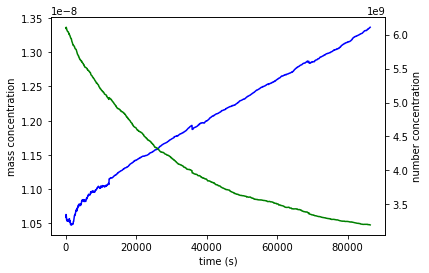

In [13]:
plt.plot(time,mass_conc,'b',label='mass conc')
plt.ylabel('mass concentration')
plt.xlabel('time (s)')
plt.twinx()
plt.plot(time,num_conc, 'g',label='num conc')
plt.ylabel('number concentration');

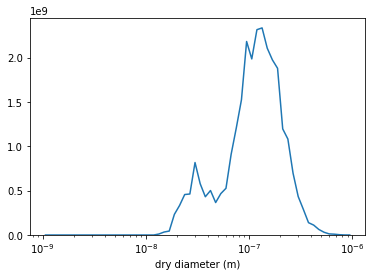

In [17]:
diam_grid = ppmc.BinGrid(60,'log',1e-9,1e-6)
dry_diameters = aero_state.dry_diameters
num_concs = aero_state.num_concs
dist = ppmc.histogram_1d(diam_grid,dry_diameters,num_concs)
plt.plot(diam_grid.centers,dist)
plt.xscale('log')
plt.xlabel('dry diameter (m)')
plt.ylim(bottom=0);

In [18]:
species = "BC"
mass_frac_grid = ppmc.BinGrid(100,'linear',0,1)
mass_frac_histogram = []
num_concs = aero_state.num_concs
dry_diameters = aero_state.dry_diameters
species_mass_frac = np.zeros(aero_state.__len__())
species_index = aero_data.spec_by_name(species)
for i_part in range(aero_state.__len__()):
    particle = aero_state.particle(i_part)
    masses = particle.species_masses
    species_mass_frac[i_part] = masses[species_index] / np.sum(masses[0:19])
vals = ppmc.histogram_2d(diam_grid,dry_diameters,mass_frac_grid,species_mass_frac,num_concs)

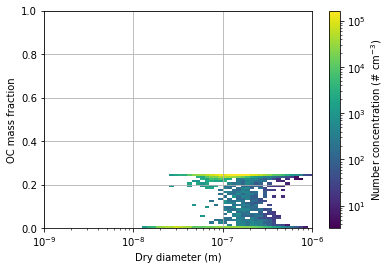

In [19]:
plt.pcolormesh(diam_grid.edges,mass_frac_grid.edges,np.array(vals).T/1e6,norm=matplotlib.colors.LogNorm())
plt.xscale('log')
plt.xlim([1e-9,1e-6])
plt.colorbar(label='Number concentration (# cm$^{-3}$)')
plt.xlabel('Dry diameter (m)')
plt.ylabel('OC mass fraction')
plt.grid();